# Attitudes + interactions with demographics
This notebook is to see whether demogrphics might have an impact on attitudes.

In [127]:
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plot_likert
import starbars 

import os
import sys
import yaml
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from scripts import utils

plot_likert.__internal__.BAR_LABEL_FORMAT = "%.1f" # plotting shows % with 2 decimals

# ignore plotting warnings to save space
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Vars
courses_cg = ["COMP202", "COMP250"]
courses_ee = ["COMP251", "COMP424", "COMP551"]
courses = courses_cg + courses_ee

deg_type = ["Undergraduate", "Graduate"]
years = ["U0", "U1", "U2", "U3", "U4+", "M1", "M2", "M3+", "PhD1", "PhD2", "PhD3", "PhD4", "PhD5+"]
majors = ["CS/SWE major", "CS/SWE minor", "Other"]
genders = ["Man", "Woman", "Other", "Prefer not to answer"]
minorities = ["Yes", "No", "Prefer not to answer"]
age = ["<18", "18-24", "25-34", "35-44", ">45", "Prefer not to answer"]
ethics_knowledge = ["Yes", "No"]
likert = range(1, 8)
likert_values = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Neutral", "Somewhat Agree", "Agree", "Strongly Agree"]

attitudes = ["Interest", "Value", "Self-efficacy", "Responsibility"]
attitudes_mean = [f"{attitude} mean" for attitude in attitudes]

demographics = {"Degree type": deg_type,
                "Year": years,
                "Gender": genders,
                "Visible minority": minorities,
                "Age": age,
                "Ethics experience": ethics_knowledge,
                "Field": majors,
                "Career": likert}

# current semester (for script purposes)
semester = "F2025"

In [129]:
data_dir = os.path.join(project_root, 'data')

ee_file = "F2025_ee_clean.csv"
cg_file = "F2025_cg_clean.csv"
questions_file = f"{semester}_survey.yaml"

ee_data_path = os.path.join(data_dir, 'clean', ee_file)
cg_data_path = os.path.join(data_dir, 'clean', cg_file)

In [130]:
ee_data_full = pd.read_csv(ee_data_path, header=[0,1], index_col=0)

# remove rows with students who did not attend EE
ee_data = ee_data_full[ee_data_full["EE course"]["None"] == 0]

cg_data_full = pd.read_csv(cg_data_path, header=[0,1], index_col=0)
# add the students who did not attend EE
cg_data = pd.concat([cg_data_full, ee_data_full[ee_data_full["EE course"]["None"] == 1]], axis=0)

data_all = [ee_data, cg_data]

# rebuild the multiindexing properly to make data access easier
for d in data_all:
    utils.rebuild_multiindex(d)

# get survey questions
with open(os.path.join(data_dir, questions_file), 'r') as yaml_file:
    questions = yaml.safe_load(yaml_file)

In [131]:
# make one dataframe with all demographic and attitude data
ee_data_demo = ee_data_full[list(demographics.keys()) + attitudes]
cg_data_demo = cg_data_full[list(demographics.keys()) + attitudes]

for attitude in attitudes:
    ee_data_demo[f"{attitude} mean"] = ee_data_demo[attitude].mean(axis=1)
    cg_data_demo[f"{attitude} mean"] = cg_data_demo[attitude].mean(axis=1)
    
utils.rebuild_multiindex(ee_data_demo)
utils.rebuild_multiindex(cg_data_demo)

data = pd.concat([ee_data_demo, cg_data_demo])
data.reset_index(inplace=True)

## Attitudes and degree type
Sample size for graduate students is too small for meaninfgul results.

## Attitudes and year of study

---- Analysis for attituces and Degree type ----
Undergraduate: n = 107
Graduate: n = 4
---- Analysis for attituces and Year ----
U0: n = 9
U1: n = 40
U2: n = 19
U3: n = 27
U4+: n = 12
M1: n = 2
M2: n = 0
M3+: n = 0
PhD1: n = 0
PhD2: n = 0
PhD3: n = 1
PhD4: n = 0
PhD5+: n = 1


,W,pval,equal_var
Interest mean,0.957965,0.434002,True
Value mean,1.661292,0.164781,True
Self-efficacy mean,0.761935,0.552431,True
Responsibility mean,1.975233,0.103879,True


Normality test for U0 group


,,W,pval,normal
Interest mean,,0.937033,0.551038,True
Value mean,,0.947616,0.663920,True
Self-efficacy mean,,0.854993,0.084547,True
Responsibility mean,,0.974154,0.927738,True


Normality test for U1 group


,,W,pval,normal
Interest mean,,0.920584,0.008034,False
Value mean,,0.816552,0.000015,False
Self-efficacy mean,,0.985590,0.881874,True
Responsibility mean,,0.924246,0.010499,False


Normality test for U2 group


,,W,pval,normal
Interest mean,,0.944852,0.321821,True
Value mean,,0.836654,0.004100,False
Self-efficacy mean,,0.959813,0.568701,True
Responsibility mean,,0.941173,0.276808,True


Normality test for U3 group


,,W,pval,normal
Interest mean,,0.911504,0.024760,False
Value mean,,0.815367,0.000256,False
Self-efficacy mean,,0.958337,0.338500,True
Responsibility mean,,0.897529,0.011748,False


Normality test for U4+ group


,,W,pval,normal
Interest mean,,0.809707,0.012105,False
Value mean,,0.730457,0.001683,False
Self-efficacy mean,,0.945042,0.565996,True
Responsibility mean,,0.933004,0.413041,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Year,4,102,1.842247,ns,0.126480,0.067377
Value mean,Year,4,102,2.335372,ns,0.060484,0.083899
Self-efficacy mean,Year,4,102,7.028956,***,0.000049,0.216083
Responsibility mean,Year,4,102,0.851472,ns,0.495912,0.032312


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Year,4,33.847519,ns,2.135010,0.097896,0.067377
Value mean,Year,4,34.886914,ns,2.574135,0.054652,0.083899
Self-efficacy mean,Year,4,32.300771,***,9.052298,0.000051,0.216083
Responsibility mean,Year,4,33.897987,ns,0.899441,0.475157,0.032312


Post-hoc test for Self-efficacy mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,U0,U1,4.355556,3.720000,0.635556,0.413676,1.536362,10.403193,0.563293,ns,0.645402
1,U0,U2,4.355556,4.210526,0.145029,0.492438,0.294513,17.922109,0.998196,ns,0.110131
2,U0,U3,4.355556,4.866667,-0.511111,0.451788,-1.131308,14.282889,0.787903,ns,-0.416537
3,U0,U4+,4.355556,5.266667,-0.911111,0.453556,-2.008819,13.704240,0.312149,ns,-0.894448
4,U1,U2,3.720000,4.210526,-0.490526,0.337812,-1.452070,26.600897,0.600949,ns,-0.453063
5,U1,U3,3.720000,4.866667,-1.146667,0.275197,-4.166714,45.750941,0.001226,**,-1.080610
6,U1,U4+,3.720000,5.266667,-1.546667,0.278090,-5.561752,20.177663,0.000163,***,-1.687812
7,U2,U3,4.210526,4.866667,-0.656140,0.383538,-1.710757,36.583462,0.440172,ns,-0.511733
8,U2,U4+,4.210526,5.266667,-1.056140,0.385619,-2.738819,28.998899,0.072249,ns,-0.885783
9,U3,U4+,4.866667,5.266667,-0.400000,0.332142,-1.204303,30.553057,0.748897,ns,-0.353165


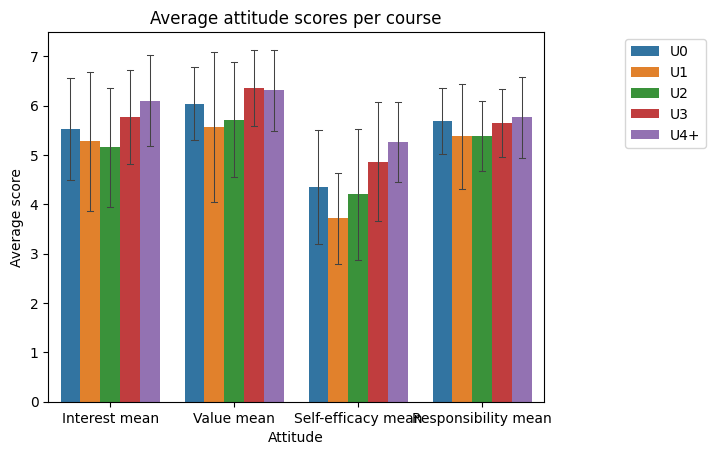

---- Analysis for attituces and Gender ----
Man: n = 46
Woman: n = 61
Other: n = 0
Prefer not to answer: n = 4


,W,pval,equal_var
Interest mean,3.247855,0.074386,True
Value mean,4.534569,0.035554,False
Self-efficacy mean,0.213336,0.645121,True
Responsibility mean,0.412911,0.521897,True


Normality test for Man group


,,W,pval,normal
Interest mean,,0.933963,0.011723,False
Value mean,,0.814294,0.000004,False
Self-efficacy mean,,0.953533,0.064230,True
Responsibility mean,,0.911858,0.001996,False


Normality test for Woman group


,,W,pval,normal
Interest mean,,0.909913,0.000274,False
Value mean,,0.863850,0.000007,False
Self-efficacy mean,,0.986751,0.751652,True
Responsibility mean,,0.964863,0.077123,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Gender,1,105,18.015001,***,0.000047,0.146446
Value mean,Gender,1,105,9.105659,**,0.003198,0.079800
Self-efficacy mean,Gender,1,105,2.611276,ns,0.109107,0.024266
Responsibility mean,Gender,1,105,0.805585,ns,0.371482,0.007614


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Gender,1,74.366825,***,16.183207,0.000137,0.146446
Value mean,Gender,1,67.796672,**,7.922272,0.006386,0.079800
Self-efficacy mean,Gender,1,95.646487,ns,2.591322,0.110746,0.024266
Responsibility mean,Gender,1,81.973079,ns,0.749409,0.389190,0.007614


Post-hoc test for Interest mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,Man,Woman,4.9,5.878689,-0.978689,0.243283,-4.022836,74.366825,0.000137,***,-0.822895


Post-hoc test for Value mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,Man,Woman,5.478261,6.170492,-0.692231,0.245938,-2.814653,67.796672,0.006386,**,-0.585037


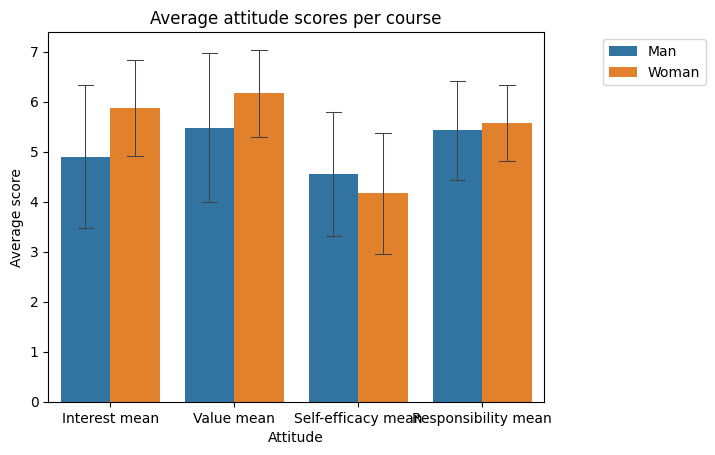

---- Analysis for attituces and Visible minority ----
Yes: n = 56
No: n = 50
Prefer not to answer: n = 5


,W,pval,equal_var
Interest mean,1.745593,0.189331,True
Value mean,0.203195,0.653093,True
Self-efficacy mean,1.388736,0.241308,True
Responsibility mean,1.204098,0.275038,True


Normality test for Yes group


,,W,pval,normal
Interest mean,,0.939732,7.565413e-03,False
Value mean,,0.771563,6.121691e-08,False
Self-efficacy mean,,0.969720,1.706566e-01,True
Responsibility mean,,0.876877,3.702061e-05,False


Normality test for No group


,,W,pval,normal
Interest mean,,0.875557,0.000082,False
Value mean,,0.839566,0.000008,False
Self-efficacy mean,,0.989201,0.925758,True
Responsibility mean,,0.969997,0.231381,True


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Visible minority,1,104,0.007953,ns,0.929110,0.000076
Value mean,Visible minority,1,104,1.231390,ns,0.269696,0.011702
Self-efficacy mean,Visible minority,1,104,0.697193,ns,0.405643,0.006659
Responsibility mean,Visible minority,1,104,0.066848,ns,0.796494,0.000642


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Visible minority,1,91.386998,ns,0.007719,0.930181,0.000076
Value mean,Visible minority,1,101.776383,ns,1.226692,0.270662,0.011702
Self-efficacy mean,Visible minority,1,103.684802,ns,0.710731,0.401142,0.006659
Responsibility mean,Visible minority,1,102.849391,ns,0.066915,0.796400,0.000642


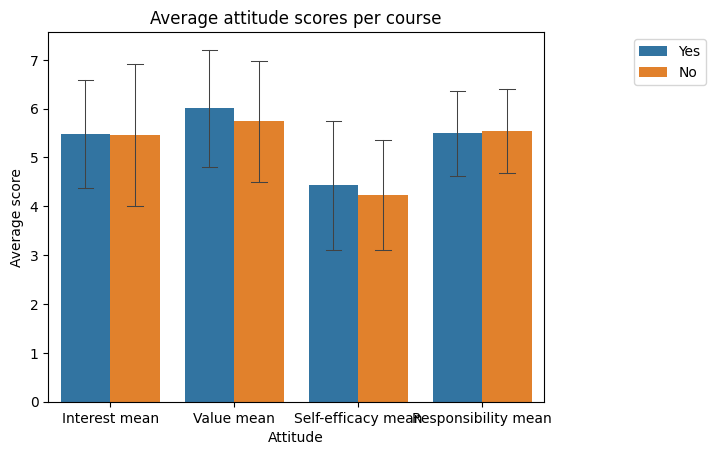

---- Analysis for attituces and Age ----
<18: n = 0
18-24: n = 108
25-34: n = 2
35-44: n = 0
>45: n = 0
Prefer not to answer: n = 1
---- Analysis for attituces and Ethics experience ----
Yes: n = 46
No: n = 65


,W,pval,equal_var
Interest mean,0.582493,0.446985,True
Value mean,0.020851,0.885453,True
Self-efficacy mean,0.149482,0.699785,True
Responsibility mean,0.146374,0.702770,True


Normality test for Yes group


,,W,pval,normal
Interest mean,,0.851469,3.356378e-05,False
Value mean,,0.717777,4.435529e-08,False
Self-efficacy mean,,0.985836,8.415819e-01,True
Responsibility mean,,0.967393,2.210746e-01,True


Normality test for No group


,,W,pval,normal
Interest mean,,0.935979,0.002258,False
Value mean,,0.858180,0.000003,False
Self-efficacy mean,,0.967827,0.088557,True
Responsibility mean,,0.927925,0.000980,False


Parametric ANOVA


,Source,ddof1,ddof2,F,significance,p-unc,np2
Interest mean,Ethics experience,1,109,2.580851,ns,0.111057,0.023130
Value mean,Ethics experience,1,109,2.517867,ns,0.115460,0.022578
Self-efficacy mean,Ethics experience,1,109,10.429582,**,0.001639,0.087328
Responsibility mean,Ethics experience,1,109,3.694568,ns,0.057200,0.032784


Non-parametric ANOVA (Welch Test)


,Source,ddof1,ddof2,significance,F,p-unc,np2
Interest mean,Ethics experience,1,86.613240,ns,2.438355,0.122047,0.023130
Value mean,Ethics experience,1,91.517997,ns,2.441797,0.121592,0.022578
Self-efficacy mean,Ethics experience,1,100.999670,**,10.683285,0.001478,0.087328
Responsibility mean,Ethics experience,1,103.753153,ns,3.857682,0.052194,0.032784


Post-hoc test for Self-efficacy mean


,A,B,mean(A),mean(B),diff,se,T,df,pval,significance,hedges
0,No,Yes,4.009231,4.734783,-0.725552,0.221981,-3.268529,100.99967,0.001478,**,-0.617951


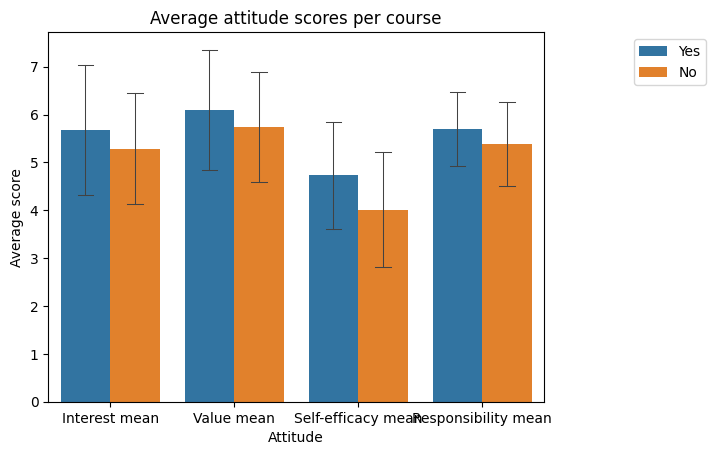

In [134]:
# we skip the field of study and the career choices
for d in demographics:
    if d == "Career" or d == "Field":
        continue
    print(f"---- Analysis for attituces and {d} ----")

    # get the data for the demographic
    data_year = pd.DataFrame()
    year_groups = {}

    for year in demographics[d]:
        group = data[data[d] == year]
        group = group[[d]+attitudes_mean]

        # print group size
        print(f"{year}: n = {len(group)}")

        if len(group) > 5:
            year_groups[year] = group
            data_year = pd.concat([data_year, group])


    if len(year_groups) >= 2:
        # test equal variance
        equal_var_year = utils.equal_var_test([year_groups[year] for year in year_groups], attitudes_mean)
        display(equal_var_year)

        # test normality
        for year in year_groups:
            norm_test = pg.normality(year_groups[year][attitudes_mean], method="shapiro")
            print(f"Normality test for {year} group")
            display(norm_test)

        # perform ANOVA
        aov_year, welch_year = utils.anova(data_year, d, attitudes_mean)
        print("Parametric ANOVA")
        display(aov_year)
        print("Non-parametric ANOVA (Welch Test)")
        display(welch_year)

        # perform posthoc test
        posthoc_attitudes = utils.anova_post_hoc(data_year, d, attitudes_mean, welch_year, False)
        for p in posthoc_attitudes:
            print(f"Post-hoc test for {p}")
            display(posthoc_attitudes[p])

        # format data for barplot
        data_year_df = data_year.melt(id_vars=[(d, '')], var_name="attitude", value_name="mean")
        data_year_df.rename(columns={(d, ''): d}, inplace=True)

        # plot
        ax = sns.barplot(
        data=data_year_df,
        x="attitude",
        y="mean",
        hue=d ,
        estimator="mean",
        errorbar="sd",
        capsize=0.25,
        errwidth=0.75
        )

        ax.set_title("Average attitude scores per course")
        ax.set_xlabel("Attitude")
        ax.set_ylabel("Average score")
        ax.legend(loc='upper right', bbox_to_anchor=(1.34, 1))
        
        plt.show()
        # p-values stars
        '''
        annotations = [(("U1", "Self-efficacy mean"), ("U3", "Self-efficacy mean"), 0.001226),
                    (("U1", "Self-efficacy mean"), ("U4+", "Self-efficacy mean"), 0.000163)]
        starbars.draw_annotation(annotations)
        '''

